<a href="https://colab.research.google.com/github/hongjai-rhee/public/blob/master/%EB%B8%8C%EB%9E%9C%EB%93%9C%EC%84%A0%ED%83%9D_%EB%9E%9C%EB%8D%A4%ED%8F%AC%EB%A0%88%EC%8A%A4%ED%8A%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 브랜드 선택모형을 랜덤 포레스트로 돌려보자
전에 했던 브랜드 선택과 동일한 데이터, ‘choice500.csv’를 불러온다. 


In [83]:
data_file='choice500.csv'    ## 데이터 파일 이름

## 필요한 라이브러리 불러오기
import pandas as pd; import numpy as np; from keras.models import Sequential; from keras.layers import Dense, Dropout, Activation; import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split; from keras.utils.np_utils import to_categorical;  from matplotlib import style
## 데이터 불러오기  
dat = pd.read_csv(data_file); 
print(dat.head())
dat = np.array(dat); ncol=dat.shape[1]; nrow=dat.shape[0]
x=dat[:,0:ncol-1]; Y=dat[:,ncol-1]-1; y = to_categorical(Y)
print(x.shape, y.shape)
class_names = ['nabisco', 'keebler', 'sunshine']    ## 브랜드 이름

   age  male  heavy  price1  price2  price3  ...  ad2  ad3  disp1  disp2  disp3  buy
0   63     0      0    1.75    1.30    1.73  ...    1    1      0      1      1    2
1   29     1      1    1.65    1.43    1.66  ...    1    1      0      0      1    3
2   30     1      1    1.62    1.53    1.76  ...    0    0      1      0      0    1
3   53     1      1    1.52    1.53    1.76  ...    0    1      1      1      1    3
4   55     0      0    1.83    1.62    1.67  ...    0    1      0      0      0    3

[5 rows x 13 columns]
(500, 12) (500, 3)


# 훈련과 검증 데이터를 분리한 후, 학습을 하고, 예측을 한다.

In [84]:
from sklearn.model_selection import train_test_split; import random
random.seed(155)
 
# 테스트 데이터 30%
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)


from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics    
 
# 학습 진행
n_tree =100   ## 의사결정 나무의 수
forest = RandomForestClassifier(n_estimators=n_tree)
forest.fit(x_train, y_train)
# 예측
y_pred = np.argmax(forest.predict(x_test), axis=1)
y_true= np.argmax(y_test, axis=1)
print("실제",list(y_true))
print("예측",list(y_pred))

실제 [2, 2, 0, 2, 1, 1, 1, 1, 0, 0, 0, 2, 2, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 2, 1, 0, 0, 2, 0, 0, 2, 1, 0, 2, 0, 2, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 2, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 2, 2, 0, 2, 0, 0, 0, 2, 0, 2, 2, 0, 2, 1, 0, 0, 2, 1, 2, 2, 1, 0, 0, 0, 0, 1, 1, 1, 2, 0, 1, 2, 0, 2, 1, 0, 1, 2, 0, 0, 1, 0, 2, 0, 1, 0, 0, 0, 0, 2, 2, 1, 0, 0, 2, 0]
예측 [2, 0, 0, 2, 1, 0, 1, 1, 0, 0, 0, 2, 2, 1, 0, 1, 1, 0, 1, 0, 1, 1, 2, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 2, 0, 2, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 2, 0, 2, 0, 0, 0, 2, 0, 2, 1, 0, 0, 1, 0, 0, 0, 1, 2, 0, 1, 0, 0, 0, 2, 1, 1, 1, 0, 0, 1, 2, 0, 2, 1, 0, 1, 2, 0, 0, 1, 1, 2, 2, 1, 0, 0, 2, 0, 1, 2, 1, 2, 0, 2, 2]


# 검증데이터에 대한 예측력을 살펴보자.
랜덤 포레스트는 여러 개의 모형이 collaborate하는 ensemble 모형이므로 예측력이 훨씬 좋아짐을 알 수 있다. How brilliant it is! 


In [85]:
# 정확도 확인
acc= metrics.accuracy_score(y_true, y_pred)
import matplotlib.pyplot as plt; import numpy as np; from sklearn.metrics import confusion_matrix
print("훈련 세트 정확도 : {:.3f}".format(forest.score(x_train,y_train)))
print("테스트 세트 정확도 : {:.3f}".format(forest.score(x_test,y_test)))

print("Confusion Matrix")
print("*****************")
print(confusion_matrix(y_true, y_pred))   ## 대각선이 올바른 예측

훈련 세트 정확도 : 1.000
테스트 세트 정확도 : 0.780
Confusion Matrix
*****************
[[68  2  7]
 [ 8 28  0]
 [10  4 23]]


# X의 영향력 평가
학습된 모형에서 각 특성변수(x)가 클래스(y) 결정에 미치는 영향력을 비율로 표현하여 봅시다. 


특성 중요도 : 
[0.1031659  0.02410265 0.02178375 0.09531009 0.09366756 0.07676009
 0.15522647 0.12856127 0.10718226 0.07204395 0.06131215 0.06088386]


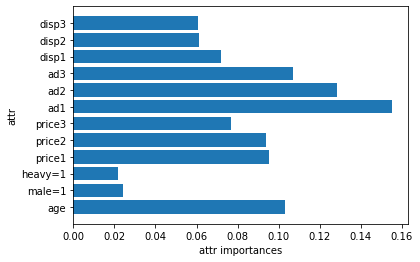

In [86]:
# 특성 중요도

xname=['age', 'male=1', 'heavy=1', 'price1', 'price2', 'price3', 'ad1', 'ad2', 'ad3', 'disp1', 'disp2', 'disp3',]
print("특성 중요도 : \n{}".format(forest.feature_importances_))

# 특성 중요도 시각화 하기
def plot_feature_importances(model):
    n_features = x.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), xname)
    plt.xlabel("attr importances")
    plt.ylabel("attr")
    plt.ylim(-1, n_features)
plt.show()
plot_feature_importances(forest)

In [103]:
print("age  male  heavy price1 price2 price3 adv1 adv2 adv3  disp1 disp2 disp3")
for i in range(7):
    print(x_test[i])
    print("=======> 이 소비자는", class_names[y_pred[i]], "을 살 것으로 예측됩니다")
    print()


age  male  heavy price1 price2 price3 adv1 adv2 adv3  disp1 disp2 disp3
[29.    1.    1.    1.65  1.43  1.66  1.    1.    1.    0.    0.    1.  ]
=======> 이 소비자는 sunshine 을 살 것으로 예측됩니다

[43.    1.    1.    1.59  1.73  1.64  0.    1.    1.    0.    0.    1.  ]
=======> 이 소비자는 nabisco 을 살 것으로 예측됩니다

[61.    1.    0.    1.51  1.86  1.67  0.    1.    1.    1.    1.    1.  ]
=======> 이 소비자는 nabisco 을 살 것으로 예측됩니다

[29.    0.    1.    1.59  1.9   1.76  1.    0.    1.    0.    0.    0.  ]
=======> 이 소비자는 sunshine 을 살 것으로 예측됩니다

[27.    1.    0.    1.55  1.47  1.67  1.    1.    0.    0.    1.    0.  ]
=======> 이 소비자는 keebler 을 살 것으로 예측됩니다

[49.    0.    0.    1.5   1.45  1.62  0.    1.    1.    0.    1.    0.  ]
=======> 이 소비자는 nabisco 을 살 것으로 예측됩니다

[37.    0.    1.    1.87  1.72  1.73  1.    1.    1.    1.    1.    0.  ]
=======> 이 소비자는 keebler 을 살 것으로 예측됩니다

